# Linear, Polynomial, and Decision Tree Regression

In [1]:
# inline plotting instead of popping out
%matplotlib inline

from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/'
    'housing/housing.data',
    header=None,
    sep='\s+')

df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


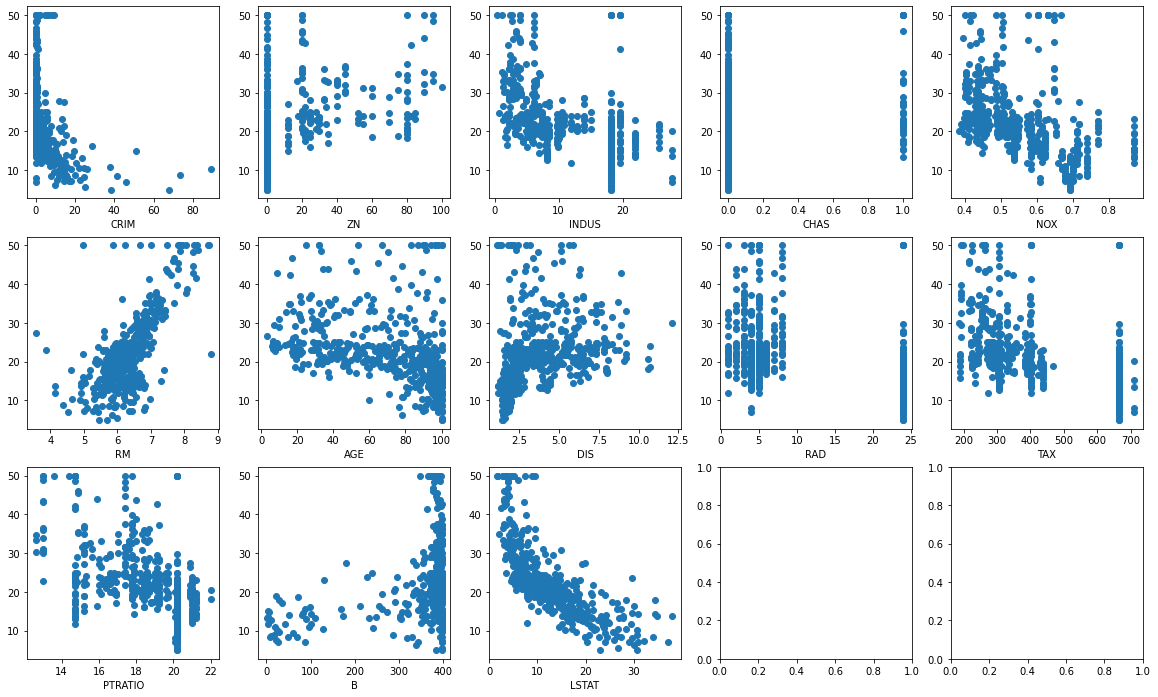

In [3]:
x_vars = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

_, subplot_arr = plt.subplots(3, 5, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 5
    y_idx = idx % 5
    subplot_arr[x_idx, y_idx].scatter(df[x_var], df['MEDV'])
    subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

In [4]:
X_rm = df['RM'].values[:, np.newaxis]
y = df['MEDV'].values

slr = LinearRegression()
# fit 
slr.fit(X_rm, y)

y_pred = slr.predict(X_rm)

print('Slope (w_1): %.2f' % slr.coef_[0])
print('Intercept/bias (w_0): %.2f' % slr.intercept_)

Slope (w_1): 9.10
Intercept/bias (w_0): -34.67


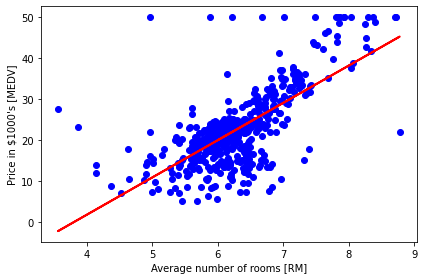

In [5]:
# To simplify our codes, predefine a function to visualize to regression line and data scatter plot.
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


lin_regplot(X_rm, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

In [6]:
X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training
slr = LinearRegression()
slr.fit(X_train_std, y_train)

# Testing
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

#Training data points: 354
#Testing data points: 152
MSE train: 19.96, test: 27.20
R^2 train: 0.76, test: 0.67


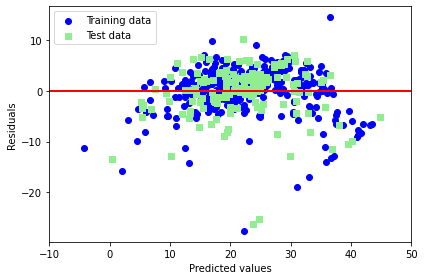

In [7]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [8]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

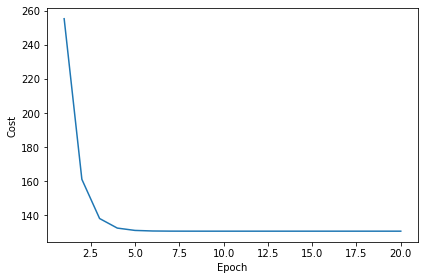

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_rm_std = sc_x.fit_transform(X_rm)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_rm_std, y_std)

plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

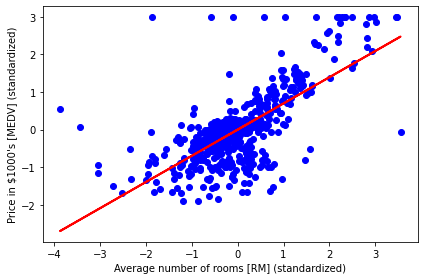

In [10]:
lin_regplot(X_rm_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

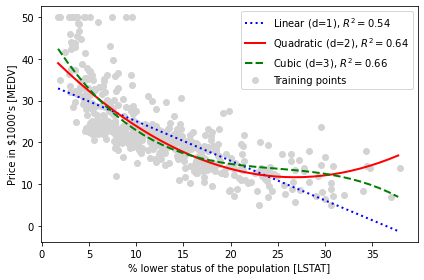

In [11]:
X_lin = df['LSTAT'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

# Fit features
lin_regr = LinearRegression()
lin_regr.fit(X_lin, y)
linear_r2 = r2_score(y, lin_regr.predict(X_lin))

quad_regr = LinearRegression()
quad_regr.fit(X_quad, y)
quadratic_r2 = r2_score(y, quad_regr.predict(X_quad))

cubic_regr = LinearRegression()
cubic_regr.fit(X_cubic, y)
cubic_r2 = r2_score(y, cubic_regr.predict(X_cubic))

# Plot results
X_range = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]
y_lin_pred = lin_regr.predict(X_range)
y_quad_pred = quad_regr.predict(quadratic.fit_transform(X_range))
y_cubic_pred = cubic_regr.predict(cubic.fit_transform(X_range))

plt.scatter(X_lin, y, label='Training points', color='lightgray')

plt.plot(
    X_range,
    y_lin_pred,
    label='Linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',
    lw=2,
    linestyle=':')

plt.plot(
    X_range,
    y_quad_pred,
    label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_range,
    y_cubic_pred,
    label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [12]:
regr = LinearRegression()

print('[Linear]')
print('#Features: %d' % X_train_std.shape[1])
regr = regr.fit(X_train_std, y_train)
y_train_pred = regr.predict(X_train_std)
y_test_pred = regr.predict(X_test_std)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Quadratic]')
X_quad_train = quadratic.fit_transform(X_train_std)
X_quad_test = quadratic.fit_transform(X_test_std)
print('#Features: %d' % X_quad_train.shape[1])
regr = regr.fit(X_quad_train, y_train)
y_train_pred = regr.predict(X_quad_train)
y_test_pred = regr.predict(X_quad_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Cubic]')
X_cubic_train = cubic.fit_transform(X_train_std)
X_cubic_test = cubic.fit_transform(X_test_std)
print('#Features: %d' % X_cubic_train.shape[1])
regr = regr.fit(X_cubic_train, y_train)
y_train_pred = regr.predict(X_cubic_train)
y_test_pred = regr.predict(X_cubic_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

[Linear]
#Features: 13
MSE train: 19.96, test: 27.20
R^2 train: 0.76, test: 0.67

[Quadratic]
#Features: 105
MSE train: 4.10, test: 29.48
R^2 train: 0.95, test: 0.65

[Cubic]
#Features: 560
MSE train: 0.00, test: 21611.28
R^2 train: 1.00, test: -258.55


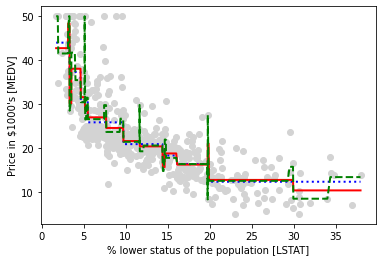

In [13]:
tree_3 = DecisionTreeRegressor(max_depth=3)
tree_3.fit(X_lin, y)
tree_4 = DecisionTreeRegressor(max_depth=4)
tree_4.fit(X_lin, y)
tree_5 = DecisionTreeRegressor(max_depth=5)
tree_5.fit(X_lin, y)

sort_idx = X_lin.flatten().argsort()

plt.scatter(X_lin, y, color='lightgray')

plt.plot(
    X_lin[sort_idx],
    tree_3.predict(X_lin)[sort_idx],
    color='blue',
    lw=2,
    linestyle=':')
plt.plot(
    X_lin[sort_idx],
    tree_4.predict(X_lin)[sort_idx],
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_lin[sort_idx],
    tree_5.predict(X_lin)[sort_idx],
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

MSE train: 1.42, test: 14.43
R^2 train: 0.98, test: 0.83


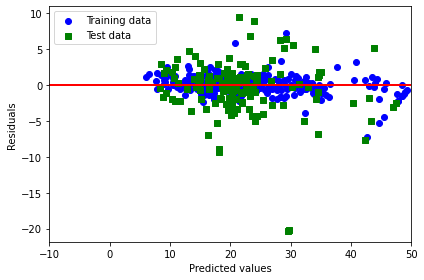

In [14]:
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()